# Diabetes Prediction

![](https://m.economictimes.com/thumb/msid-61997607,width-1200,height-900,resizemode-4,imgsize-175312/suffering-from-diabetes-five-apps-to-help-you-manage-your-lifestyle-better.jpg)
[Img Source](https://economictimes.indiatimes.com/magazines/panache/are-you-a-diabetes-patient-five-apps-that-can-help-manage-your-lifestyle-better/articleshow/61997607.cms)

The Pima Indians Diabetes Database is a widely used dataset in the field of medical research and specifically, in the study of diabetes. The dataset contains information about female patients of Pima Indian heritage, who are 21 years of age or older. The data was collected by the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of this notebook is to use the Pima Indians Diabetes Database to build a predictive model for diabetes using logistic regression. We will be using the popular data science packages in Python, such as pandas, numpy, seaborn, matplotlib and scikit-learn. The logistic regression algorithm from scikit-learn will be used to build our classification model. Our goal is to use the information in the dataset to accurately predict whether a patient has diabetes or not.

---

# Imports

In [1]:
#importing necessary libraries into our code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading our dataset
DataPath = 'https://raw.githubusercontent.com/knagiel/Reproducible_Research_Project/main/diabetes2.csv'
data = pd.read_csv(DataPath)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

In [3]:
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [4]:
data.shape

(768, 9)

In [5]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [6]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Processing

In [9]:
#split the dataset into x and y values
#x-independent variables
#y-dependent variables
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
x = data[features]
y = data.Outcome

In [10]:
#splitting the dataset into features and target variables
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.10, random_state = 0)

# Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression

#instantiate the model using the default parameters
reg = LogisticRegression (max_iter = 1000)

In [12]:
#fit the model with the data
reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
#predicting the output for our test set
y_pred = reg.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [14]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
253,0,86,68,32,0,35.8,0.238,25
622,6,183,94,0,0,40.8,1.461,45
235,4,171,72,0,0,43.6,0.479,26
351,4,137,84,0,0,31.2,0.252,30


### Model's Summary | Addition to the original code | start

In [15]:
from scipy.linalg import inv
from scipy.stats import norm
from tabulate import tabulate

# Assuming you have already fit your model and it's named 'reg'
# Also assuming your training set is named 'x_train'

# Get coefficient names and values
coef_names = ['Intercept'] + list(data.columns[:-1])  # Assuming data is your input dataframe
coefs = np.hstack([reg.intercept_, reg.coef_[0]])

# Add intercept to the predictors data
X = np.hstack([np.ones((x_train.shape[0], 1)), x_train])

# Calculate matrix of predicted probabilities
pi_mat = 1 / (1 + np.exp(-np.dot(X, coefs)))

# Reshape pi_mat
pi_mat = pi_mat.reshape(-1, 1)

# Calculate the Fisher Information Matrix
V = np.dot((pi_mat * (1 - pi_mat) * X).T, X)

# Calculate the standard errors
standard_errors = np.sqrt(np.diag(inv(V)))

# Calculate z-values (coefficients divided by their standard errors)
z_values = coefs / standard_errors

# Calculate p-values
p_values = [2 * (1 - norm.cdf(np.abs(z))) for z in z_values]

# Combine all the values into a table and print it
table = list(zip(coef_names, coefs, standard_errors, z_values, p_values))
print(tabulate(table, headers=["Variable", "Coefficient", "Std. Error", "Z-value", "P-value"], tablefmt='grid'))


+--------------------------+---------------+--------------+------------+-------------+
| Variable                 |   Coefficient |   Std. Error |    Z-value |     P-value |
+==========================+===============+==============+============+=============+
| Intercept                |   -8.41681    |  0.758961    | -11.0899   | 0           |
+--------------------------+---------------+--------------+------------+-------------+
| Pregnancies              |    0.11939    |  0.0332706   |   3.58846  | 0.000332634 |
+--------------------------+---------------+--------------+------------+-------------+
| Glucose                  |    0.0334648  |  0.00390013  |   8.58043  | 0           |
+--------------------------+---------------+--------------+------------+-------------+
| BloodPressure            |   -0.0134115  |  0.00555331  |  -2.41504  | 0.0157333   |
+--------------------------+---------------+--------------+------------+-------------+
| SkinThickness            |    0.00108116 

### Addition to the original code | end

In [16]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[48,  3],
       [ 7, 19]], dtype=int64)

Text(0.5, 257.44, 'Predicted Label')

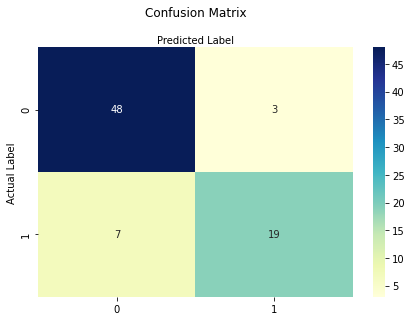

In [17]:
#plotting confusion matrix
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


In [18]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.8701298701298701


In [19]:
import pickle
import os 

#saving the model
# if not os.path.exists('models') :
#       os.makedirs('models')
        
Model_Path = 'logistic_reg.sav'
pickle.dump(reg, open(Model_Path, 'wb'))


In [20]:
#user defined data set
data = [[5, 0, 33.7, 50, 150, 74, 0.5, 53]]
#(not diabetic)

#create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

#predict on new data
ourmodelprediction = reg.predict(df)
ourmodelprediction

array([0], dtype=int64)

---
# Thank You
---